In [16]:
import sys
#sys.path.append('../../drormd') # If you install drormd locally or run on sherlock, you won't need this.
from drormd import plot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [17]:
!pwd

/Users/evefine/Desktop/dror/KOR_tao/sims/KOR/PCP_tao


In [15]:
conditions = ['PCP', 'apo', 'SK']
colors = {'PCP': '#60b75d', 'apo': '#835d5d', 'SK':'#db712a'}
data = plot.load('results_8/', conditions)
data_PCP = plot.load('../PCP_05_20/results/', ['PCP'])
data_PCP_og = plot.load('rmsd_PCPog/results_5/', ['PCP'])
data_M_PCP = plot.load('../../MOR_sims/PCP_05_21/results/', ['PCP'])
#data
#data
mult_colors = {'PCP':['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']}
#data_M_PCP

# functions #

[0]


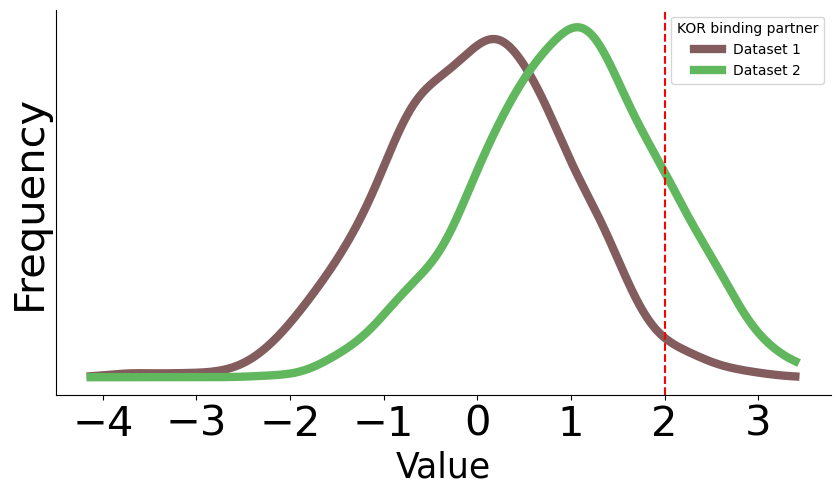

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

def plot_smooth_frequency(data1, data_other=[], labels=("Dataset 1", "Dataset 2"), title="Smoothed Frequency Distribution",
                          vert=None,leg=True,xaxis='Value', color='#835d5d',xlim=[], colors=[]):
    """
    Plots a smoothed frequency graph for two datasets using Kernel Density Estimation (KDE).
    
    Parameters:
        data1 (array-like): First dataset.
        data2 (array-like): Second dataset.
        labels (tuple): Labels for the two datasets.
        title (str): Title of the plot.
    """
    # Create KDE estimations for both datasets
    kde1 = gaussian_kde(data1)
    kdes = {}
    min_d2 = 10000000
    max_d2 = -100000
    if len(data_other) >= 1:
        for i, data in enumerate(data_other):
            #print(data)
            test = gaussian_kde(data)
            kdes[i] = test
            if min(data) < min_d2:
                min_d2 = min(data)
            if max(data) > max_d2:
                max_d2 - max(data)
        

    # Define x range based on data
    x_min = min(min(data1), min_d2)
    x_max = max(max(data1), max_d2)
    dist = x_max-x_min
    x_values = np.linspace(x_min - dist*0.05, x_max + dist*0.05, 1000)
    
    if not colors:
        colors = ['#60b75d','#db712a']
    if colors:
        colors = colors
    
    # Compute KDE values
    y1 = kde1(x_values)
    ys = []
    print(list(kdes.keys()))
    if len(list(kdes.values())) >= 1:
        for i in range(len(list(kdes.values()))):
            ys.append(kdes[i](x_values))
    #print(ys)
    # Plot smooth frequency distributions
    plt.figure(figsize=(10, 5))
    plt.plot(x_values, y1, label=labels[0], linewidth=6,color=color)
    if len(ys) >= 1:
        for i, y in enumerate(ys):
            plt.plot(x_values, y, label=labels[i+1], linewidth=6,color=colors[i])

    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    if vert:
        for val in vert:
            plt.axvline(val,linestyle='dashed',color='red')
    
    # Formatting
    plt.xlabel(xaxis,size=25)
    plt.yticks([])
    plt.xticks(size=30)
    plt.ylabel("Frequency",size=30)
    plt.gca().spines["top"].set_visible(False)

    #plt.title(title)
    plt.legend(title='KOR binding partner')
    if len(xlim) >= 1:
        plt.xlim(xlim[0],xlim[1])
    
    if not leg:
        plt.legend().set_visible(False)

        
        
    #plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# Example usage
data1 = np.random.normal(0, 1, 1000)  # Sample dataset 1
data2 = np.random.normal(1, 1, 1000)  # Sample dataset 2
plot_smooth_frequency(data1, data_other=[data2],vert=[2])


def make_lists(data,cond,reps,start=0,finish=1000,offset=0,skip=False, met=None, filt=False):
    occ_dist = []
    alt_dist = []
    if met:
        met_dist = []
        for i in range(1,reps+1):
            if i == 10 and skip == True:
                continue
            r = f'{cond}_r{i}'
            data_r = data[cond][r]
            if filt:
                #print('filt')
                print(len(data_r))
                data_r_2 = data_r[data_r['W287-chi1'] < -120].reset_index(drop=True)
                print(len(data_r_2))
            if 'chi' in met:
                if not filt:
                    for i in range(start+offset,finish+offset):
                        if i < len(data_r[met]):
                            val = data_r[met][i]
                            if val < 0:
                                val += 360
                            if val > 230:
                                val -= 360
                            met_dist.append(val)
                else:
                    for i in range(len(data_r_2[met])):
                        #print(met, len(data_r_2[met]))
                        if i < len(data_r_2[met]):
                            val = data_r_2[met][i]
                            if val < 0:
                                val += 360
                            if val > 230:
                                val -= 360
                            met_dist.append(val)
                    
            else:
                if not filt:
                    met_dist += list(data_r[met].values)[start+offset:finish+offset]
                else:
                    met_dist += list(data_r_w[met].values)
        return met_dist

    for i in range(1,reps+1):
        if i == 6 and skip == True:
            continue
        r = f'{cond}_r{i}'
        data_r = data[cond][r]
        min_dist = []
        #for i in range(len(data_r['8.47-2.39'])):
        for i in range(start+offset,finish+offset):
            min_dist.append(min(data_r['8.47-2.39'][i],data_r['8.47-2.39_1'][i]))
        #print(len(min_dist))
        occ_dist += min_dist
        alt_dist += list(data_r['TM7 twist'].values)[start+offset:finish+offset]
    return (occ_dist, alt_dist)

KeyError: 'apo'

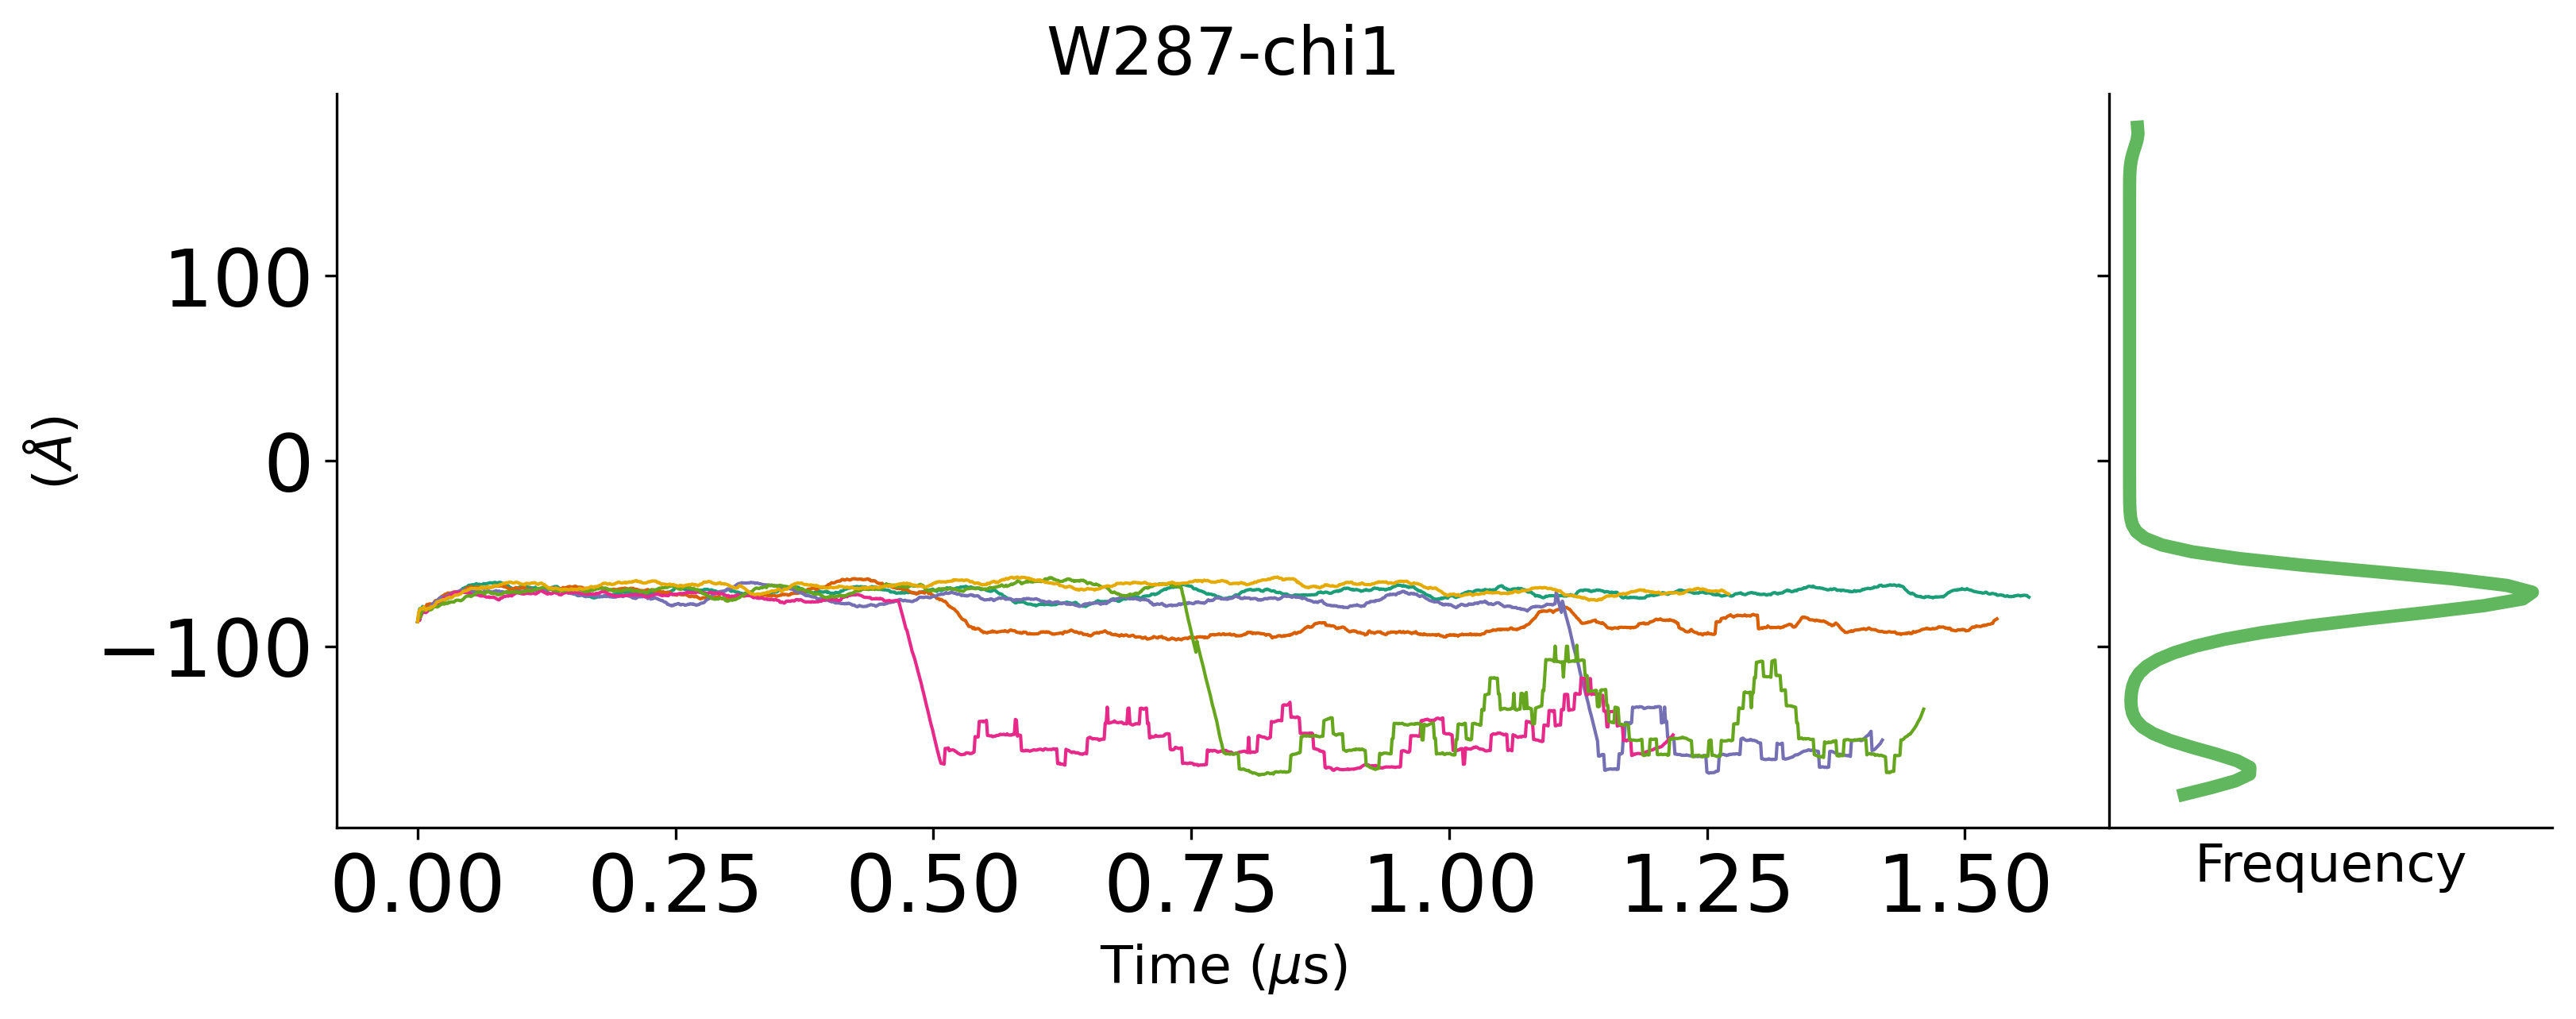

In [14]:
for metric in data['PCP']['PCP_r1']:
    trace, kde = plot.setup_trace_and_kde(metric, '')
    for condition in conditions:
        A = [data[condition][rep][metric]
             for rep in data[condition]
             if metric in data[condition][rep]]
        if not A: continue
        if metric == 'W6.48-chi1':
            plot.dihedral_range(A, 0)
        plot.add_time_trace(trace, A, f'', colors = mult_colors[condition],lw = 0, lw_smooth = 1)
        plot.add_kde(kde,  A, f'', flip = True, color = colors[condition],burnin = 0)
    trace.set_xlim(0)
    trace.set_title('MOR-PCP from pose A',size=30)
    trace.set_ylabel('RMSD of ligand to \ncryo-EM pose (Å)')
    #legend = trace.legend(title=f'{condition}',loc='best')
    #legend.set_title('Starting pose', prop={'size': 'large'})
    plt.show()

# load data #

In [35]:
reps = 6
start = 100
finish = 2000




apo_dist = make_lists(data,'apo',reps,start=start,finish=finish,skip=False,met='M142CA-I316CA')
PCP_dist = make_lists(data,'PCP',reps,start=start,finish=finish,skip=False,met='M142CA-I316CA')
SK_dist = make_lists(data,'SK',reps,start=start,finish=finish-600,skip=False,met='M142CA-I316CA')

apo_dist_y = make_lists(data,'apo',reps,start=start,finish=finish,skip=False,met='M142CA-Y320CA')
PCP_dist_y = make_lists(data,'PCP',reps,start=start,finish=finish,skip=False,met='M142CA-Y320CA')
SK_dist_y = make_lists(data,'SK',reps,start=start,finish=finish-600,skip=False,met='M142CA-Y320CA')

apo_dist_close = make_lists(data,'apo',reps,start=start,finish=finish,skip=False,met='M142CE-I316CD')
PCP_dist_close = make_lists(data,'PCP',reps,start=start,finish=finish,skip=False,met='M142CE-I316CD')
SK_dist_close = make_lists(data,'SK',reps,start=start,finish=finish-600,skip=False,met='M142CE-I316CD')

apo_Mdist = make_lists(data,'apo',reps,start=start,finish=finish,skip=False,met='M142')
PCP_Mdist = make_lists(data,'PCP',reps,start=start,finish=finish,skip=False,met='M142')
SK_Mdist = make_lists(data,'SK',reps,start=start,finish=finish-600,skip=False,met='M142')

apo_W = make_lists(data,'apo',reps,start=start,finish=finish,skip=True,met='W287-chi1')
PCP_W = make_lists(data,'PCP',reps,start=start,finish=finish,skip=False,met='W287-chi1')
SK_W = make_lists(data,'SK',reps,start=start,finish=finish-600,skip=False,met='W287-chi1')

# apo_W_2 = make_lists(data,'apo',reps,start=start,finish=finish,skip=True,met='W287-chi1', filt=True)
# PCP_W_2 = make_lists(data,'PCP',reps,start=start,finish=finish,skip=False,met='W287-chi1', filt=True)
# SK_W_2 = make_lists(data,'SK',reps,start=start,finish=finish-600,skip=False,met='W287-chi1', filt=True)

# apo_M_2 = make_lists(data,'apo',reps,start=start,finish=finish,skip=True,met='M142CE-I316CA', filt=True)
# PCP_M_2 = make_lists(data,'PCP',reps,start=start,finish=finish,skip=False,met='M142CE-I316CA', filt=True)
# SK_M_2 = make_lists(data,'SK',reps,start=start,finish=finish-600,skip=False,met='M142CE-I316CA', filt=True)



start = 100
finish = 1400

PCP_rmsd = make_lists(data_PCP,'PCP',reps,start=start,finish=finish,skip=False,met='starting')
PCP_rmsd_2 = make_lists(data_PCP,'PCP',reps,start=start,finish=finish,skip=False,met='pose_4_14')
#print(PCP_rmsd)
PCP_rmsd_og = make_lists(data_PCP_og,'PCP',reps,start=start,finish=finish,skip=False,met='tao')
M_PCP_rmsd_2 = make_lists(data_M_PCP,'PCP',reps,start=start,finish=finish,skip=False,met='pose_04_14')
M_PCP_rmsd = make_lists(data_M_PCP,'PCP',reps,start=start,finish=finish,skip=False,met='starting')

[]


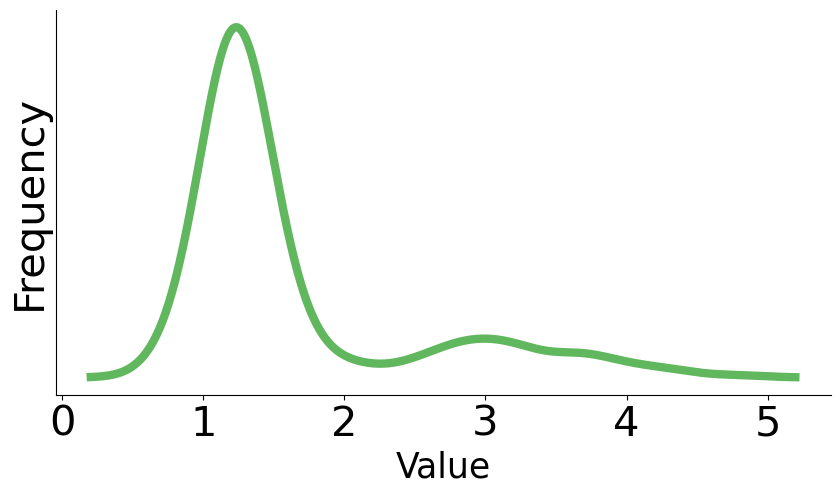

In [32]:
plot_smooth_frequency(PCP_rmsd, color='#60b75d', leg=False)

[]


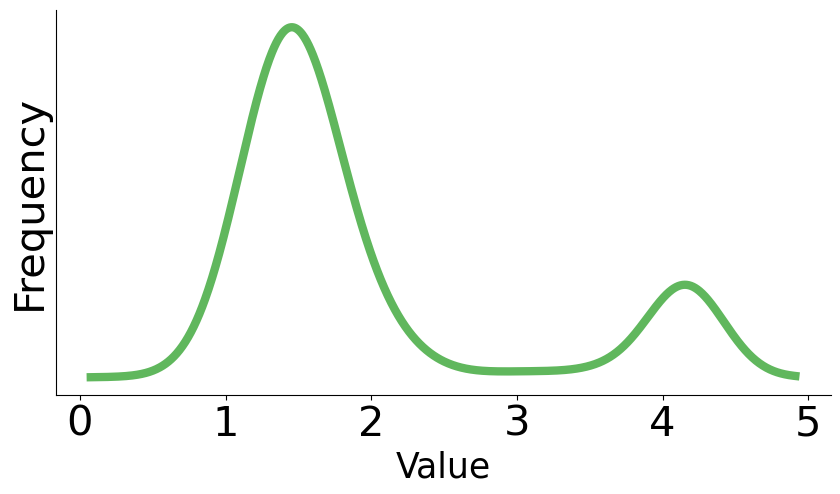

In [37]:
plot_smooth_frequency(M_PCP_rmsd, color='#60b75d', leg=False)

[0, 1]


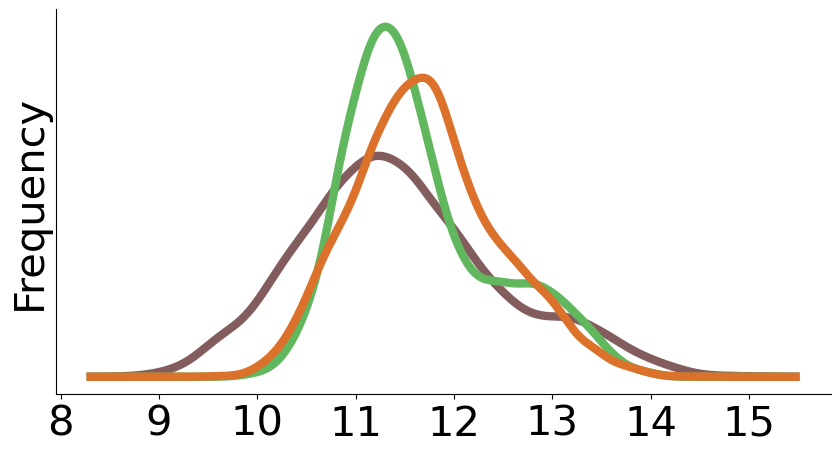

In [619]:
plot_smooth_frequency(apo_dist, data_other = [PCP_dist,SK_dist], labels=['apo', 'PCP', 'SK'],xaxis='', leg=False)

[0, 1]


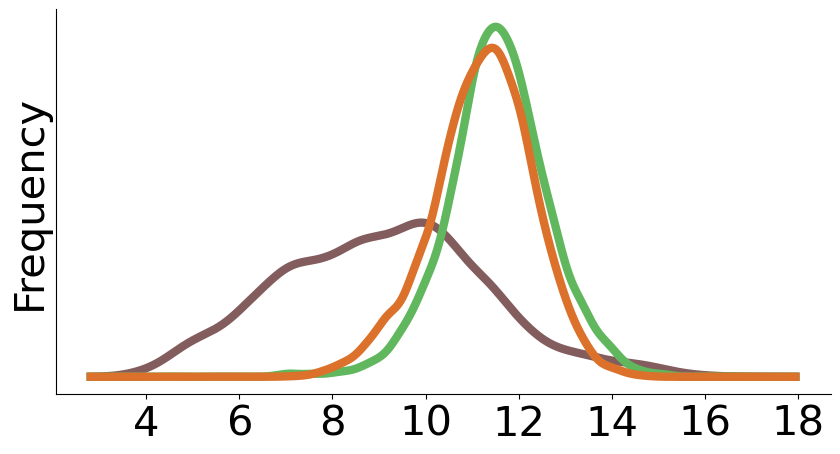

In [620]:
plot_smooth_frequency(apo_dist_close, data_other = [PCP_dist_close,SK_dist_close], labels=['apo', 'PCP', 'SK'],xaxis='', leg=False)

[0, 1]


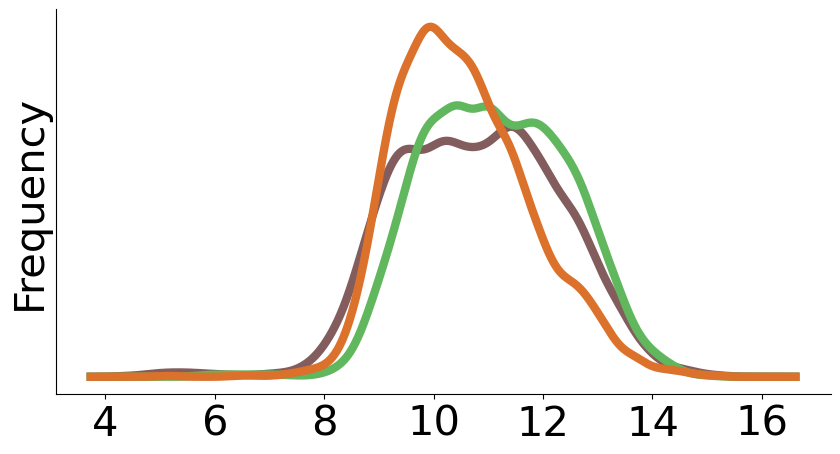

In [621]:
plot_smooth_frequency(apo_dist_y, data_other = [PCP_dist_y,SK_dist_y], labels=['apo', 'PCP', 'SK'],xaxis='', leg=False)

[0, 1]


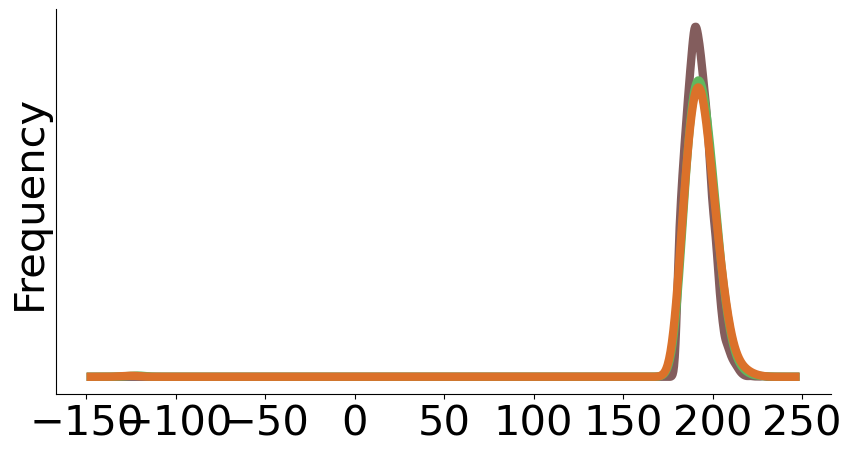

In [470]:
plot_smooth_frequency(apo_W_2, data_other = [PCP_W_2, SK_W_2], labels=['apo', 'PCP', 'SK'],xaxis='', leg=False)

[0, 1]


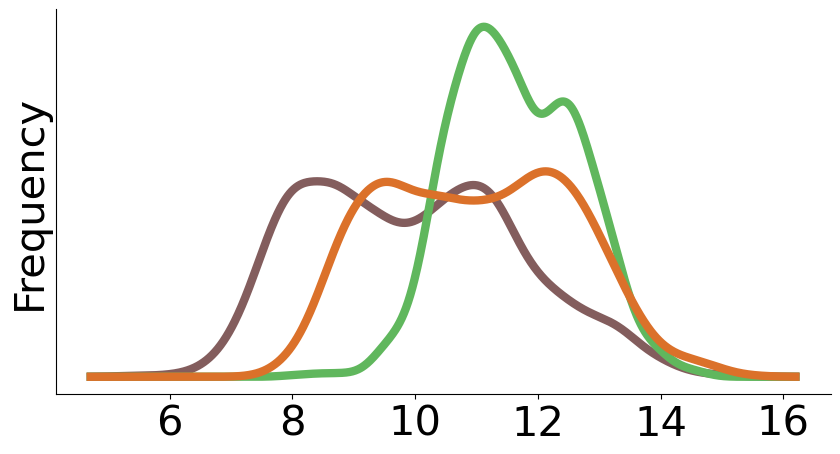

1644
7861


In [471]:
plot_smooth_frequency(apo_M_2, data_other = [PCP_M_2, SK_M_2], labels=['apo', 'PCP', 'SK'],xaxis='', leg=False)
print(len(PCP_M_2))
print(len(PCP_dist))

[0, 1]


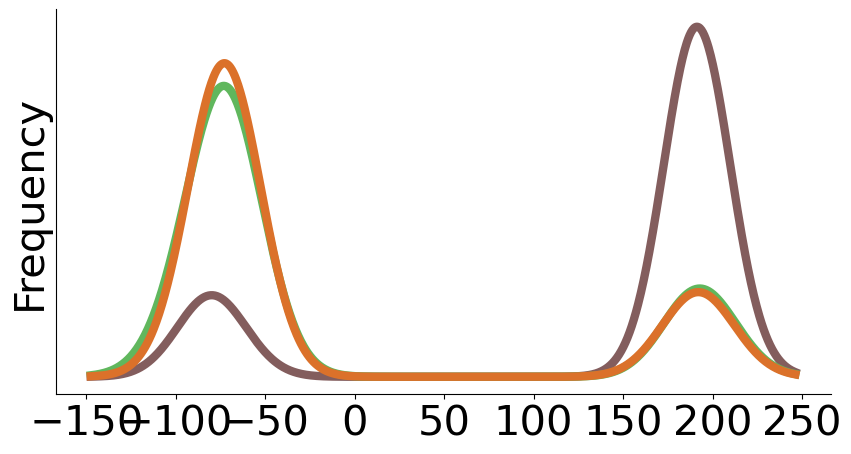

In [445]:
plot_smooth_frequency(apo_W, data_other = [PCP_W, SK_W], labels=['apo', 'PCP', 'SK'],xaxis='', leg=False)

[]


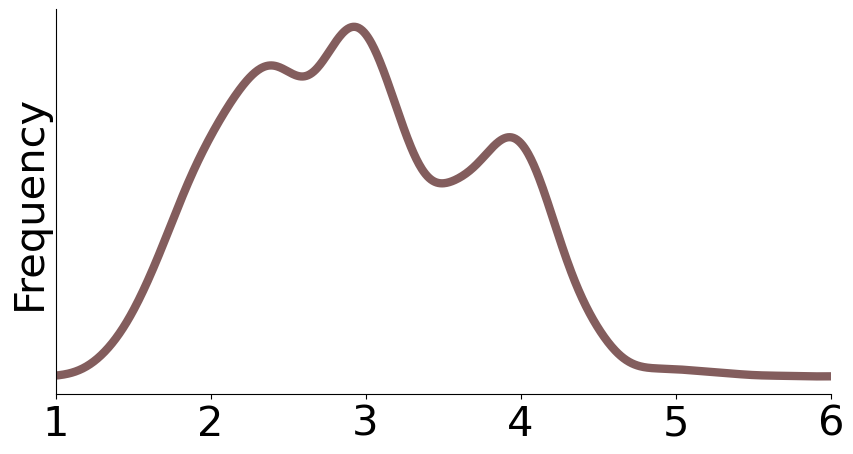

In [644]:
plot_smooth_frequency(PCP_rmsd_2,xaxis='', leg=False, xlim=[1,6])

[]


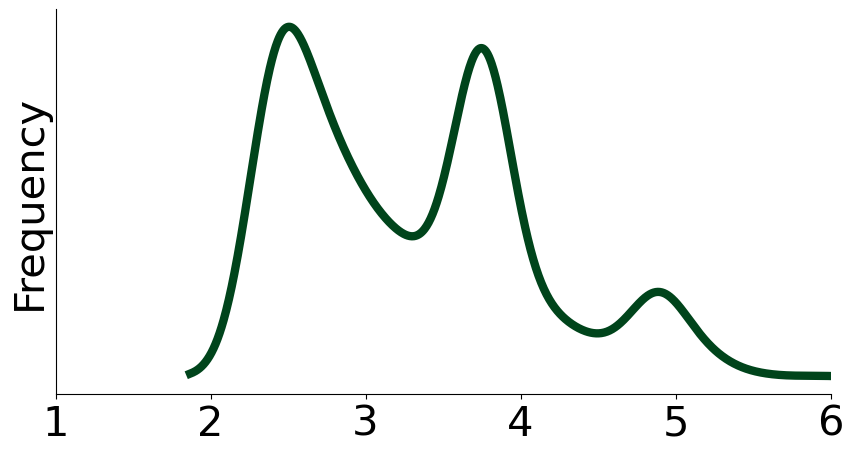

In [295]:
plot_smooth_frequency(PCP_rmsd_og,xaxis='', leg=False, color='#00441b',xlim=[1,6])

In [629]:
plot_smooth_frequency(K_PCP_rmsd,xaxis='', leg=False,color='#3e88c8')

NameError: name 'K_PCP_rmsd' is not defined

In [85]:
#plot_smooth_frequency(apo_Mdist, data_other = [PCP_Mdist, SK_Mdist], labels=['apo', 'PCP', 'SK'],xaxis='W287 chi1 dihedral (deg)', leg=True)

In [9]:
def sliding_mean(data_array, window):
    new_list = []
    for i in range(data_array.shape[0]):
        if i <= window:
            indices = range(0,2*i+1)
        else:
            indices = range(max(i - window, 0),
                            min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)
    return np.array(new_list)

['PCP_r1', 'PCP_r2', 'PCP_r3', 'PCP_r6', 'PCP_r4', 'PCP_r5']


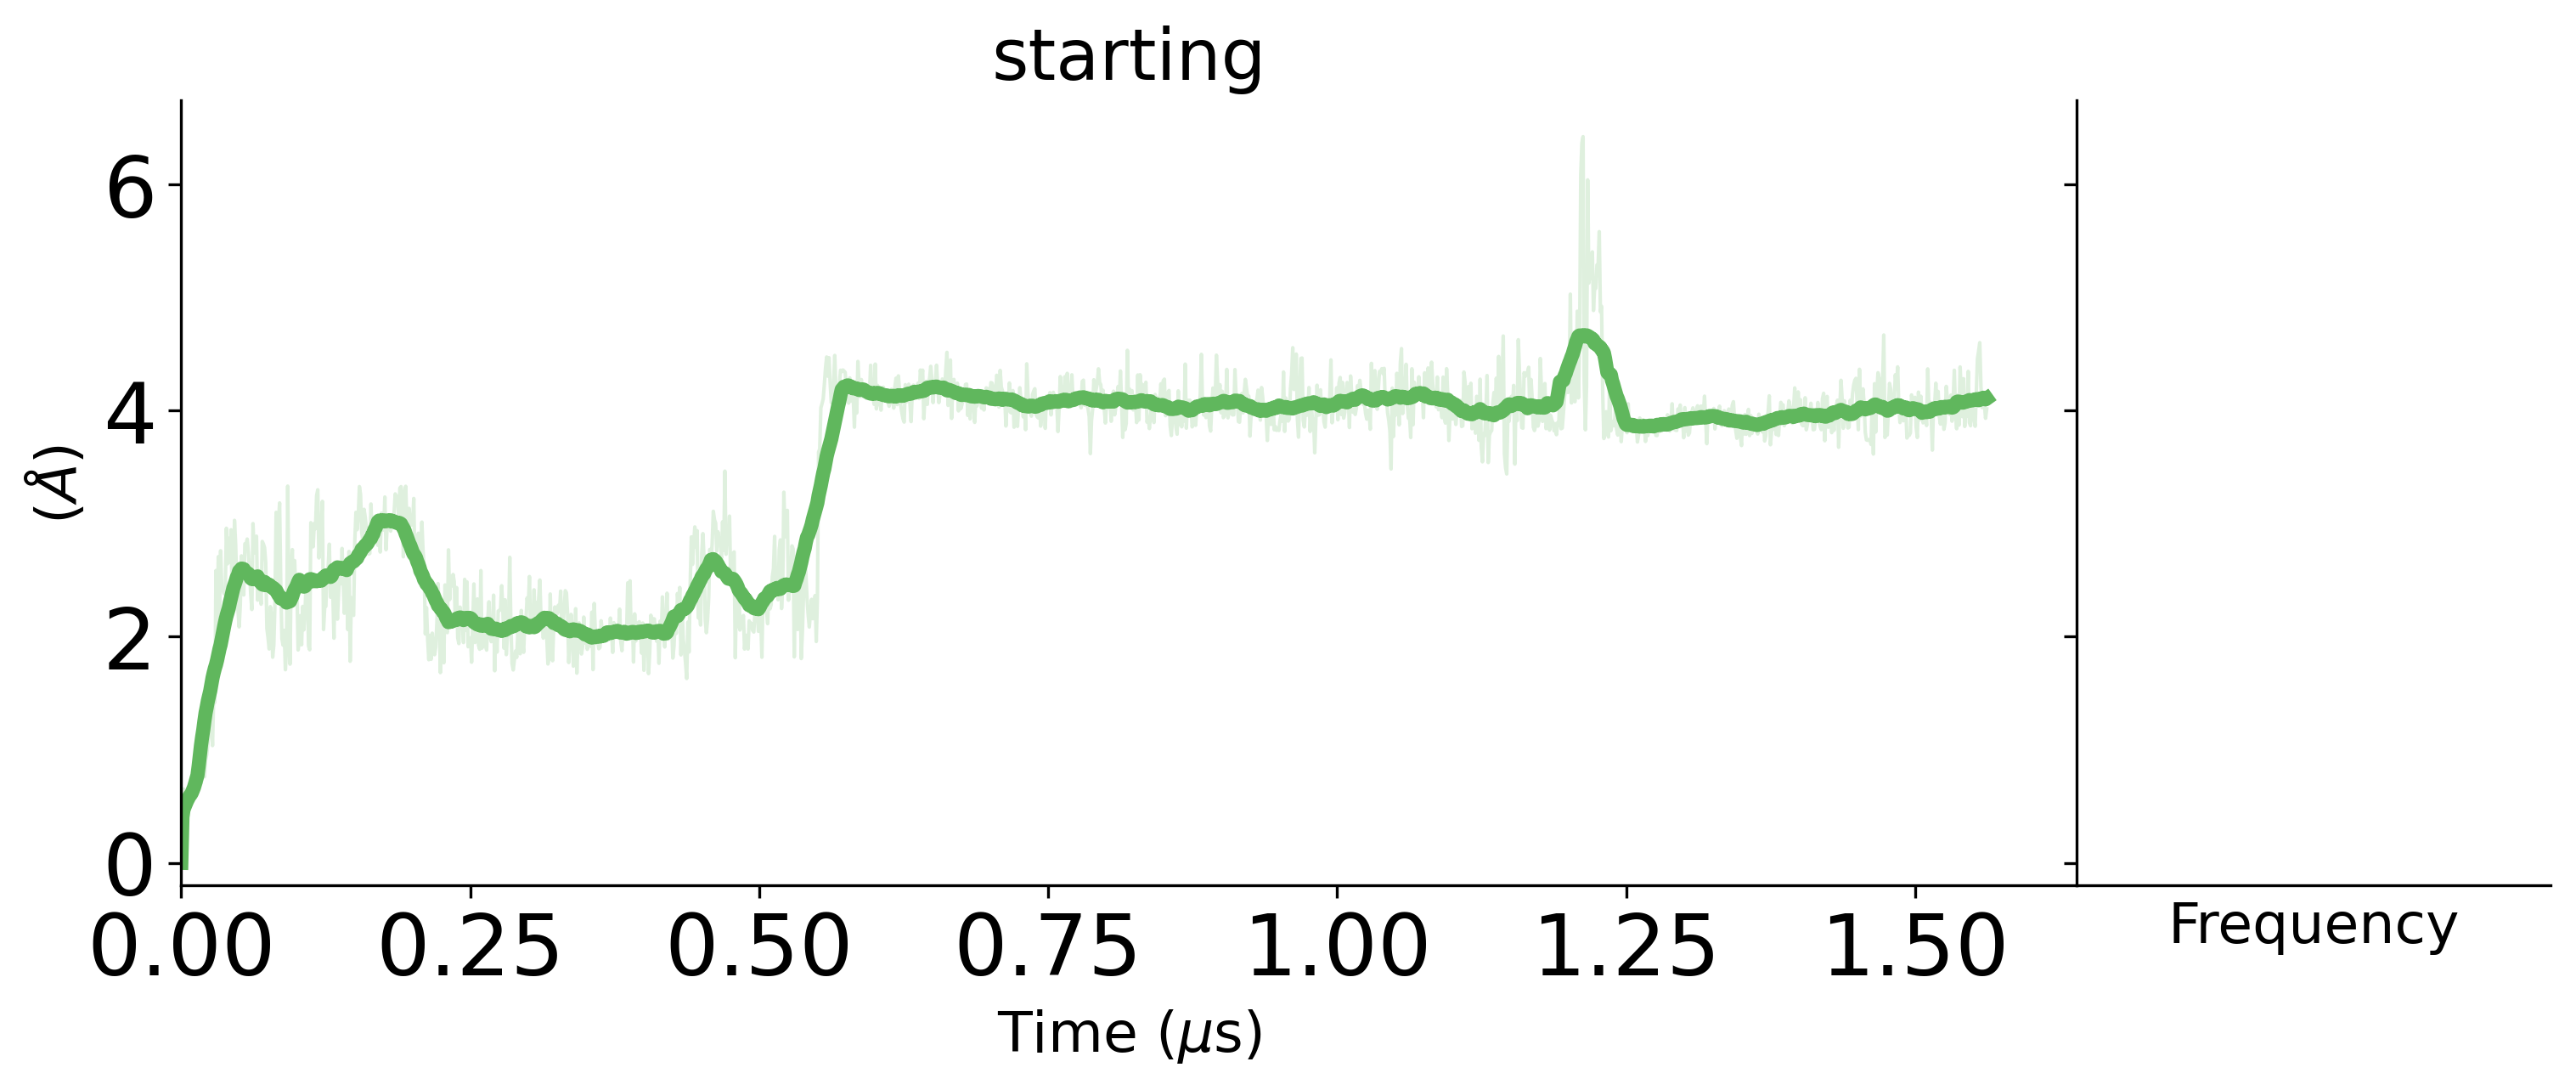

['PCP_r1', 'PCP_r2', 'PCP_r3', 'PCP_r6', 'PCP_r4', 'PCP_r5']


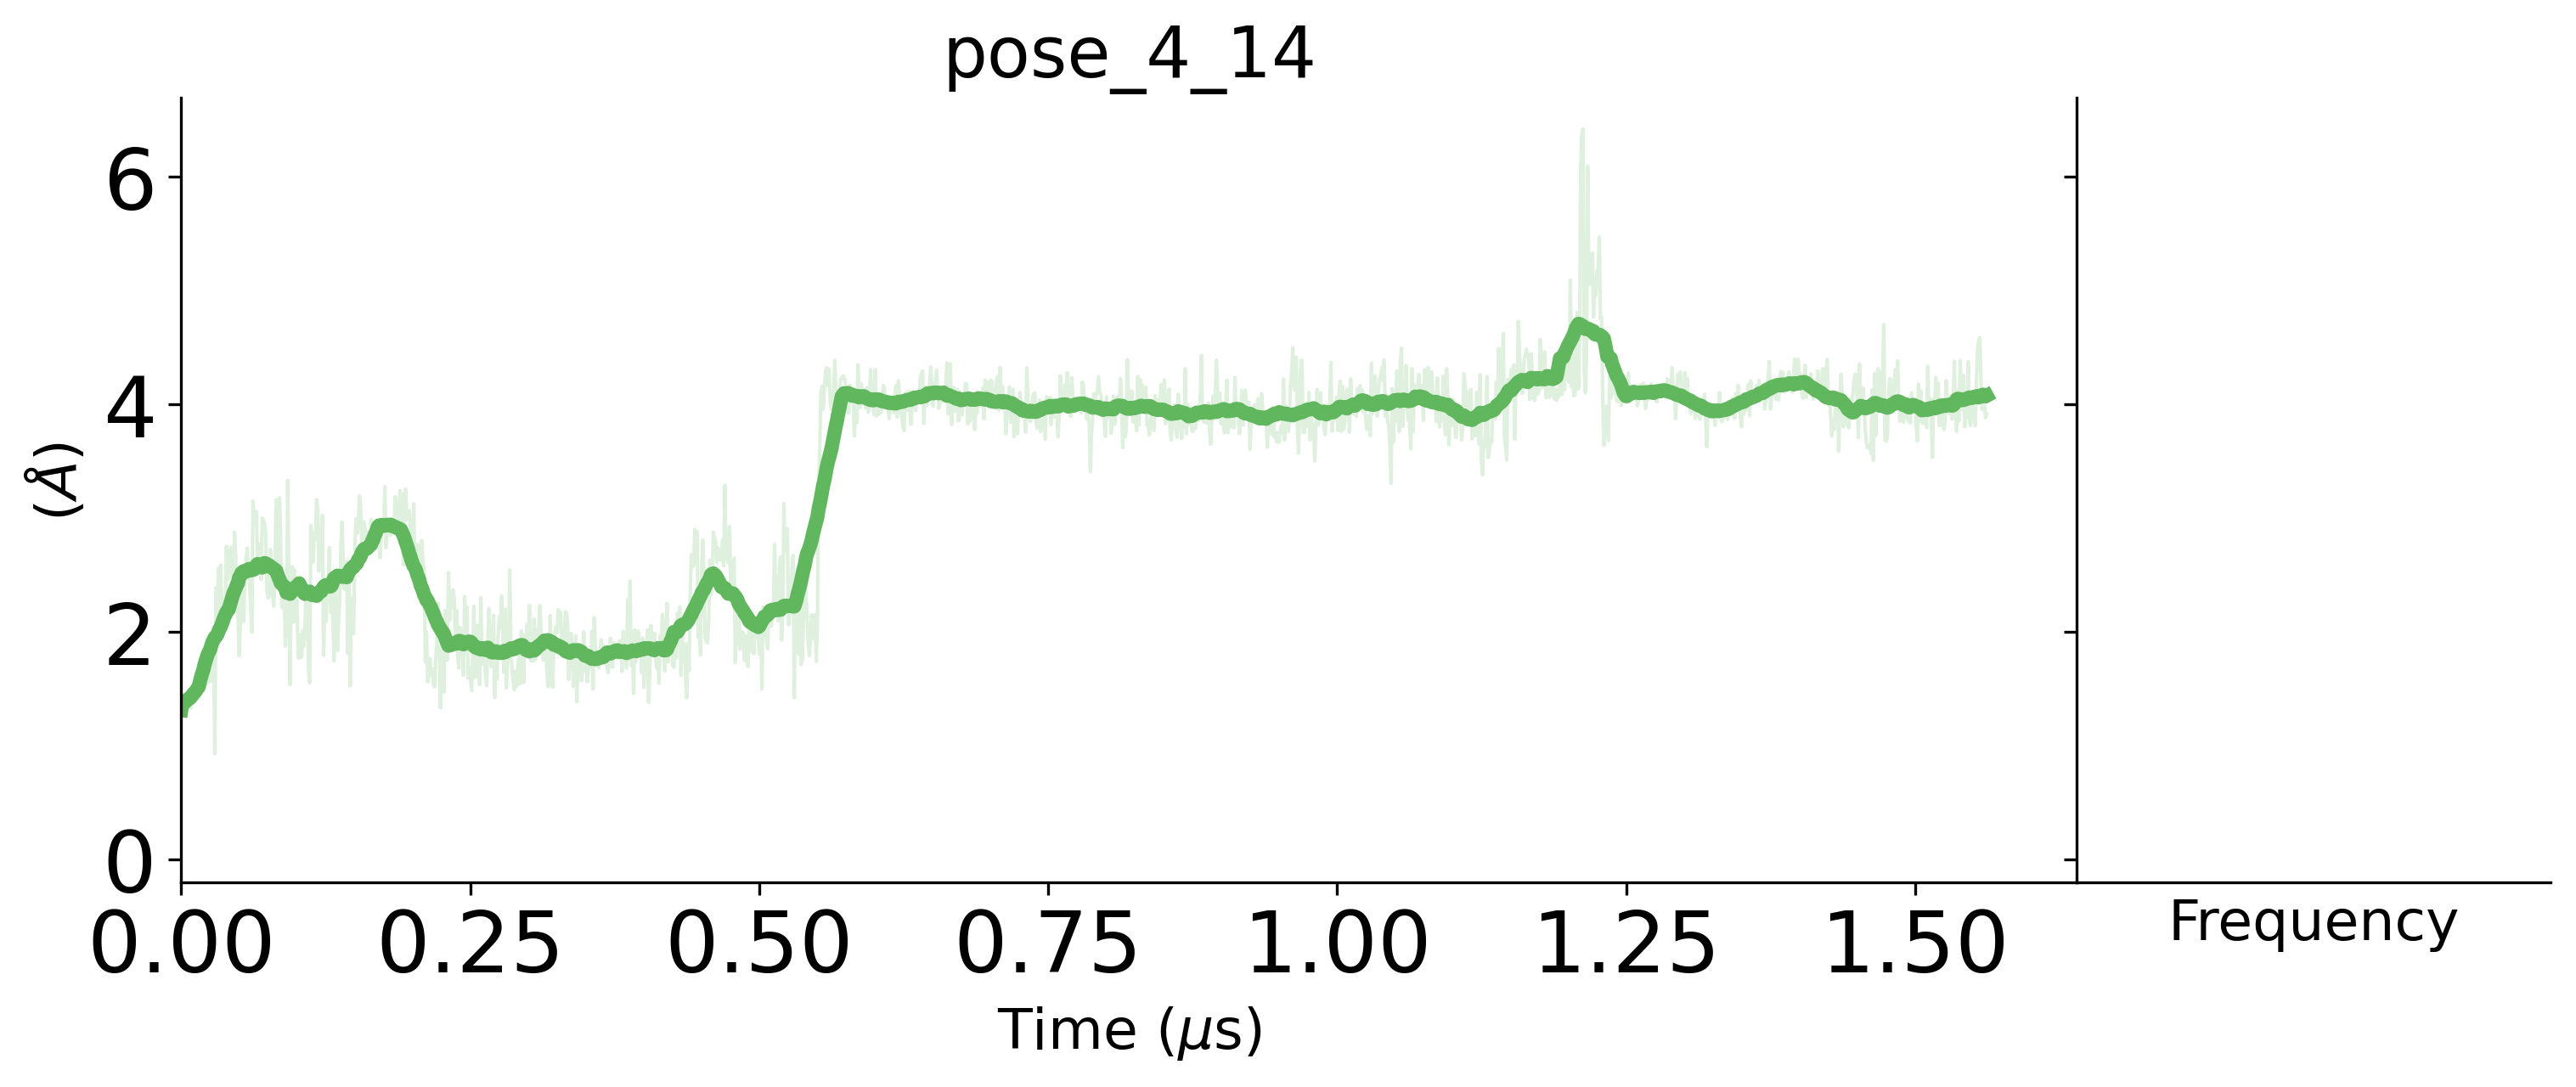

In [43]:
data_trace = data_PCP
conditions_trace = ['PCP']


for metric in data_trace['PCP']['PCP_r1']:
    #if metric == 'starting':
        #continue
    trace, kde = plot.setup_trace_and_kde(metric, '')
    for condition in conditions_trace:
        A = [data_trace[condition][rep][metric]
             for rep in data_trace[condition]
             if metric in data_trace[condition][rep]]
        i = 0
        reps_lst = [rep for rep in data_trace[condition]
                    if metric in data_trace[condition][rep]]
        print(reps_lst)
        
        A = A[i:i+1]
        #print(A)
        if not A: continue
        if 'chi' in metric:
            plot.dihedral_range(A, 0)
        plot.add_time_trace(trace, A, f'{condition}', colors = colors[condition],lw = 1, lw_smooth = 4)
        #plot.add_kde(kde,  A, f'{condition}', flip = True, color = colors[condition],burnin = 0)
    trace.set_xlim(0)
    trace.set_ylim(-.2)
    #trace.set_title('KOR-PCP', size=30)
    #trace.set_ylabel('RMSD of ligand to pose6 (Å)')
    #legend = trace.legend(title=f'Condition',loc='best')
    #legend.set_title('Starting pose', prop={'size': 'large'})
    plt.show()

In [310]:
import statistics

def compute_mean_std(numbers):
    """
    Given a list of numbers, compute the mean and standard deviation.
    
    Parameters:
    numbers (list of float): A list of numerical values.
    
    Returns:
    tuple: (mean, standard deviation)
    """
    if not numbers:
        return None, None  # Return None if the list is empty
    
    mean_value = statistics.mean(numbers)
    std_dev_value = statistics.stdev(numbers)  # Uses sample standard deviation
    
    return mean_value, std_dev_value

# Example usage
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mean, std_dev = compute_mean_std(numbers)
print(f"Mean: {mean}, Standard Deviation: {std_dev}")


Mean: 5, Standard Deviation: 2.7386127875258306


In [326]:
nums = [2.06, 1.65, 1.92, 1.83, 1.84, 1.84]

mean, std_dev = compute_mean_std(nums)
print(f"apo \n Mean: {mean}, Standard Deviation: {std_dev}")

nums = [1.56,1.53, 1.42, 1.46, 1.27, 1.22]

mean, std_dev = compute_mean_std(nums)
print(f"PCP cryo \n Mean: {mean}, Standard Deviation: {std_dev}")

nums = [1.12, 1.02, 1.06, .984, .990, .947]

mean, std_dev = compute_mean_std(nums)
print(f"PCP dif \n Mean: {mean}, Standard Deviation: {std_dev}")

nums = [1.05, 1.17, 1.09, 1.06, 1.01, 1.08]

mean, std_dev = compute_mean_std(nums)
print(f"PCP dif \n Mean: {mean}, Standard Deviation: {std_dev}")

nums = [1.48, 1.20, 1.29, 1.13, 1.10, 1.37]

mean, std_dev = compute_mean_std(nums)
print(f"SK \n Mean: {mean}, Standard Deviation: {std_dev}")

apo 
 Mean: 1.8566666666666667, Standard Deviation: 0.13366625103842283
PCP cryo 
 Mean: 1.41, Standard Deviation: 0.13798550648528274
PCP dif 
 Mean: 1.0201666666666667, Standard Deviation: 0.061846314899650034
PCP dif 
 Mean: 1.0766666666666667, Standard Deviation: 0.05354126134736334
SK 
 Mean: 1.2616666666666667, Standard Deviation: 0.14661741597322833


In [7]:
def get_values(data, condition, nreps, metric):
    reps = ['r'+str(i) for i in range(1,nreps+1)] 
    traces = []
    for rep in reps:
        trace = data[condition][condition+'_'+rep][metric].values
        if 'chi' in metric:
            print(type(trace))
            trace_new = []
            for val in trace:
                if val < 0:
                    val += 360
                if val > 230:
                    val -= 360
                trace_new.append(val)
            traces.append(np.array(trace_new))
        else:
            traces.append(trace)
    return traces    
    #print(type(trace))
    #print(trace)

apo


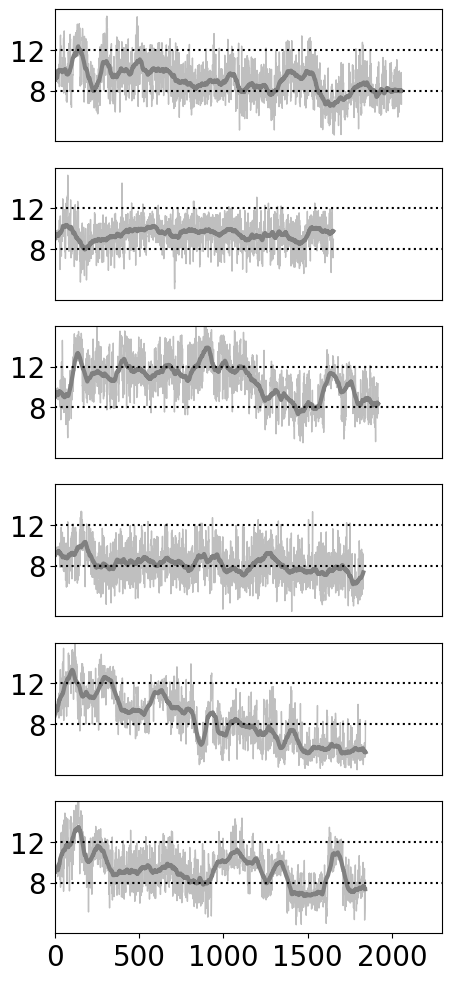

PCP


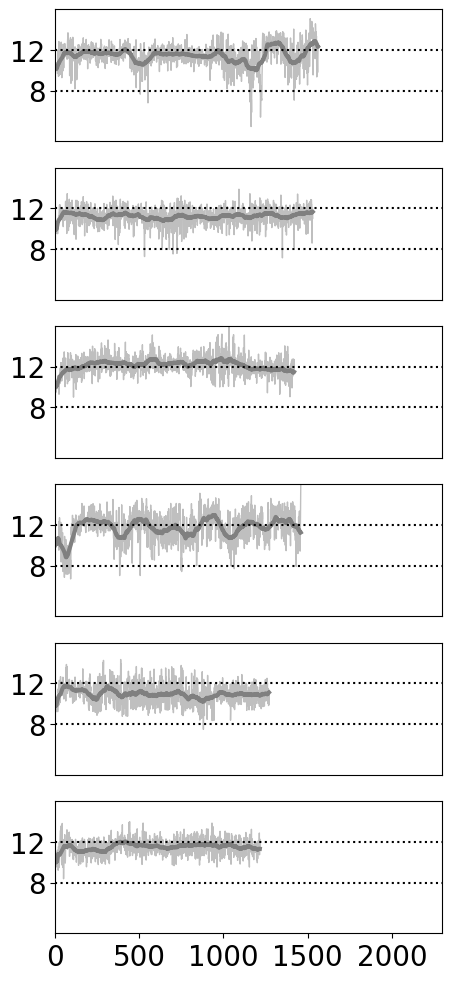

SK


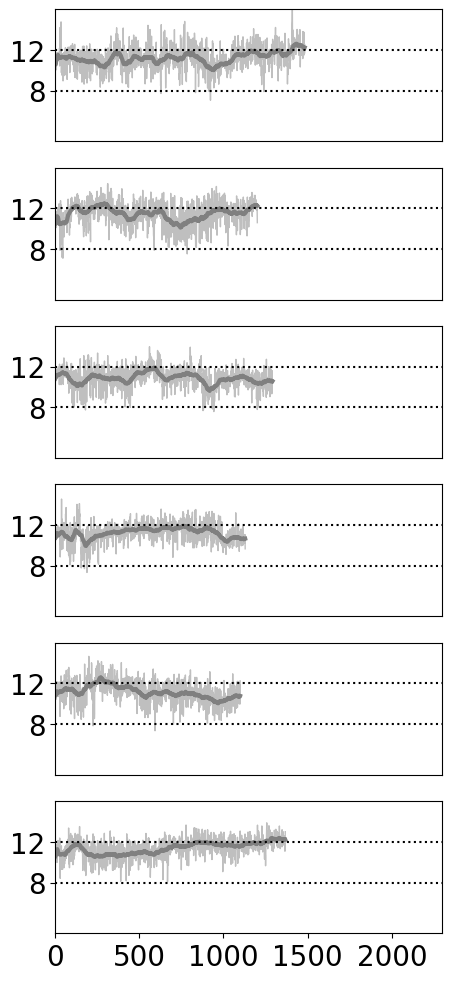

In [12]:
# data = plot.load('results_7/', conditions)
# data_PCP = plot.load('rmsd/results_2/', ['PCP'])
# data_PCP_og = plot.load('rmsd_PCPog/results_5/', ['PCP'])
# data_M_PCP = plot.load('MOR_PCP/results_2/', ['PCP'])

conditions = ['apo', 'PCP', 'SK']

for condition in conditions:
    print(condition)
    traces = get_values(data, condition, 6, 'M142CE-I316CD')
    plt.figure(1, figsize=(5,12))
    for i in range(1,7):
        plt.subplot(6,1,i)
        plt.plot(sliding_mean(traces[i-1],30), color='gray',linewidth=3)
        plt.plot(traces[i-1], alpha=0.5, color='gray', linewidth=1)
        plt.ylim(3,16)
        plt.yticks([8,12],size=20)
        plt.xlim(0,2300)
        if i != 6:
            plt.xticks([])
        else:
            plt.xticks(size=20)
        #plt.xticks([],size=30)
        #plt.axhline(traces[0][0], linestyle='--', color='k')
        plt.axhline(8, linestyle=':', color='k')
        plt.axhline(12, linestyle=':', color='k')

    plt.xticks(range(0,2500,500))
    #plt.savefig(ligand + '-lig-rmsd.pdf')
    plt.show()  

PCP


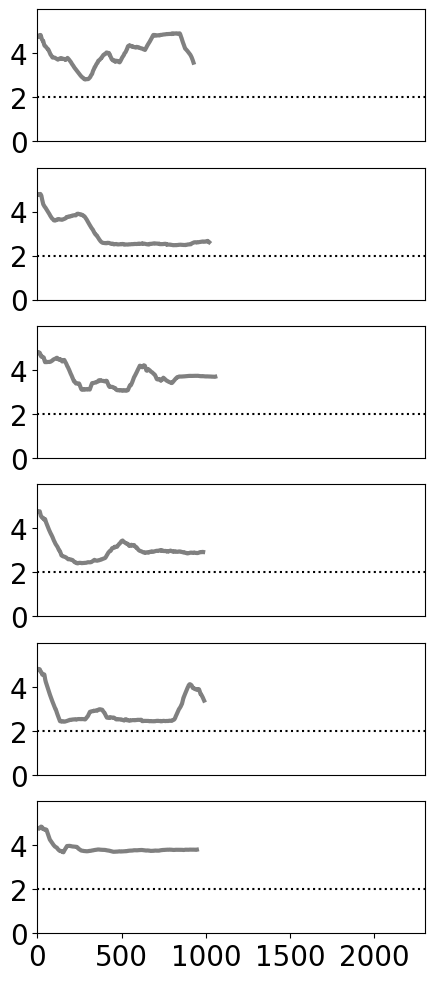

In [392]:
# data = plot.load('results_7/', conditions)
# data_PCP = plot.load('rmsd/results_2/', ['PCP'])
# data_PCP_og = plot.load('rmsd_PCPog/results_5/', ['PCP'])
# data_M_PCP = plot.load('MOR_PCP/results_2/', ['PCP'])

conditions = ['PCP']

for condition in conditions:
    print(condition)
    traces = get_values(data_PCP_og, condition, 6, 'tao')
    plt.figure(1, figsize=(5,12))
    for i in range(1,7):
        plt.subplot(6,1,i)
        plt.plot(sliding_mean(traces[i-1],50), color='gray',linewidth=3)
        #plt.plot(traces[i-1], alpha=0.5, color='gray')
        plt.ylim(0,6)
        plt.yticks([0,2,4],size=20)
        plt.xlim(0,2300)
        if i != 6:
            plt.xticks([])
        else:
            plt.xticks(size=20)
        #plt.xticks([],size=30)
        #plt.axhline(traces[0][0], linestyle='--', color='k')
        plt.axhline(2, linestyle=':', color='k')
        #plt.axhline(11, linestyle=':', color='k')

    plt.xticks(range(0,2500,500))
    #plt.savefig(ligand + '-lig-rmsd.pdf')
    plt.show()  

In [472]:
from MDAnalysis.analysis.rms import RMSF

ligand = u.select_atoms("resname SKet")
rmsf = RMSF(ligand).run()

plt.plot(ligand.atoms.indices, rmsf.rmsf)
plt.xlabel("Atom Index")
plt.ylabel("RMSF (Å)")
plt.title("Ligand RMSF")
plt.show()

NameError: name 'u' is not defined

In [473]:
!pwd

/Users/evefine/Desktop/dror/KOR_tao/sims/KOR/PCP_tao


# Dynaimc

In [483]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rms

In [484]:
# Load a topology file and a trajectory file
i = 1
u = mda.Universe("../SK_tao1/prep/dabble/system_dabbled.pdb", f"../SK_tao1/run_{i}/summary_traj_w_eq_stride5.nc")

<AtomGroup [<Atom 51434: CL16 of type CL of resname SKET, resid 10401 and segid B359 and altLoc >, <Atom 51435: C01 of type C of resname SKET, resid 10401 and segid B359 and altLoc >, <Atom 51436: N02 of type N of resname SKET, resid 10401 and segid B359 and altLoc >, ..., <Atom 51464: HC13 of type H of resname SKET, resid 10401 and segid B359 and altLoc >, <Atom 51465: HC14 of type H of resname SKET, resid 10401 and segid B359 and altLoc >, <Atom 51466: HN01 of type H of resname SKET, resid 10401 and segid B359 and altLoc >]>


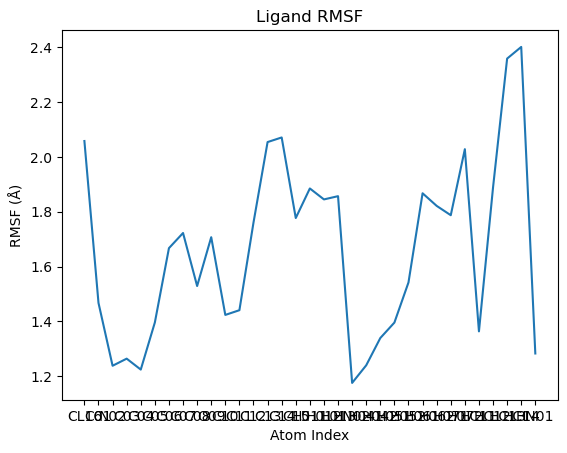

In [572]:
ligand = u.select_atoms("resname SKET and not name H")

rmsf = RMSF(ligand).run()
print(ligand)
plt.plot(ligand.atoms.names, rmsf.rmsf)
plt.xlabel("Atom Index")
plt.ylabel("RMSF (Å)")
plt.title("Ligand RMSF")
plt.show()

In [487]:
# Get the number of frames **before iterating**
num_frames = len(list(u.trajectory))  # Ensures the correct number of frames

# Initialize RMSD matrix
rmsd_matrix = np.zeros((num_frames, num_frames))

# Compute RMSD for every pair of frames
for i, ts_i in enumerate(u.trajectory):
    ref_positions = ligand.positions.copy()  # Store reference frame positions
    for j, ts_j in enumerate(u.trajectory):
        if i >= num_frames or j >= num_frames:
            continue  # Prevents index out of bounds
        mobile_positions = ligand.positions.copy()  # Get mobile frame positions
        rmsd_value = np.sqrt(np.mean(np.sum((ref_positions - mobile_positions) ** 2, axis=1)))
        rmsd_matrix[i, j] = rmsd_value  # Store RMSD in matrix

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(rmsd_matrix, cmap="viridis", origin="lower", aspect="auto")
plt.colorbar(label="RMSD (Å)")
plt.xlabel("Reference Frame")
plt.ylabel("Simulation Frame")
plt.title("Ligand RMSD Heat Map")
plt.show()

KeyboardInterrupt: 

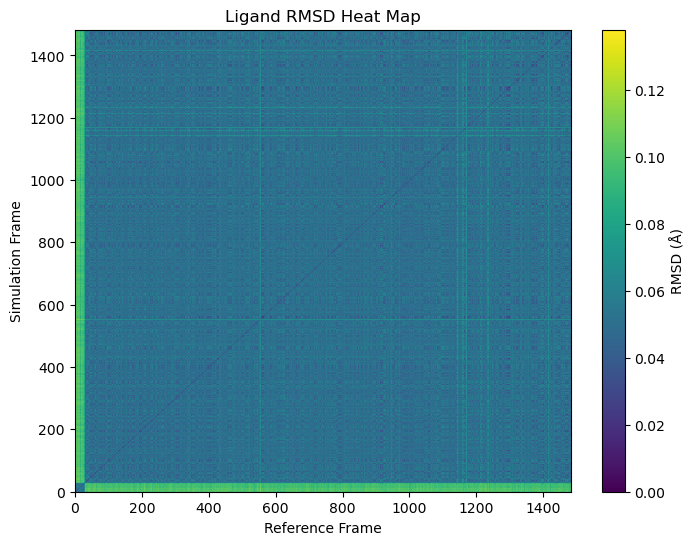

In [491]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
run = 1
# Load trajectory
traj = md.load(f"../SK_tao1/run_{run}/summary_traj_w_eq_stride5.nc", top="../SK_tao1/prep/dabble/system_dabbled.pdb")

# Select ligand atoms
ligand = traj.topology.select("resname SKET and not name H")
lig_traj = traj.atom_slice(ligand)

# Compute pairwise RMSD
rmsd_matrix = np.zeros((len(traj), len(traj)))
for i in range(len(traj)):
    rmsd_matrix[i] = md.rmsd(lig_traj, lig_traj, frame=i)

# Plot RMSD heatmap
plt.figure(figsize=(8, 6))
plt.imshow(rmsd_matrix, cmap="viridis", origin="lower", aspect="auto")
plt.colorbar(label="RMSD (Å)")
plt.xlabel("Reference Frame")
plt.ylabel("Simulation Frame")
plt.title("Ligand RMSD Heat Map")
plt.show()

In [607]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Function to compute ligand RMSD after aligning using protein Cα atoms
def make_rmsd_square(ligname, path_traj, path_top, one=False):
    # Load trajectory
    traj = md.load(path_traj, top=path_top)

    # Select ligand atoms (excluding hydrogens)
    ligand_indices = traj.topology.select(f"resname {ligname} and not element H")

    # Select alignment indices (Cα atoms in binding site)
    if ligname == 'SK':
        align_indices = traj.topology.select(
            "name CA and (resid 10833 to 10847 or resid 10883 to 10894 or resid 10910 to 10917 or resid 10961 to 10968 or resid 11002 to 11010 or resid 11061 to 11068 or resid 11087 to 11095)"
        )
    elif ligname == 'PCP':
        align_indices = traj.topology.select(
            "name CA and (resid 11110 to 11124 or resid 11160 to 11171 or resid 11187 to 11194 or resid 11238 to 11245 or resid 11279 to 11287 or resid 11338 to 11345 or resid 11364 to 11372)"
        )

    # Debugging: Check if selection is valid
    print(f"Number of ligand atoms selected: {len(ligand_indices)}")
    print(f"Number of alignment atoms selected: {len(align_indices)}")

    if len(align_indices) == 0:
        print("Error: No valid alignment indices found in trajectory.")
        return

    # Align entire trajectory to the first frame using protein Cα atoms
    traj.superpose(traj, frame=0, atom_indices=align_indices)

    # Extract ligand trajectory after alignment
    lig_traj = traj.atom_slice(ligand_indices)

    # Compute pairwise RMSD for ligand
    num_frames = len(lig_traj)
    rmsd_matrix = np.zeros((num_frames, num_frames))

    for i in range(num_frames):
        rmsd_matrix[i] = md.rmsd(lig_traj, lig_traj, frame=i, atom_indices=np.arange(len(ligand_indices)))
        
    rmsd_matrix *= 10

    # Plot RMSD heatmap
    if one:
        return(rmsd_matrix[0])

    plt.figure(figsize=(8, 6))
    plt.imshow(rmsd_matrix, cmap="viridis", origin="lower", aspect="auto")
    plt.colorbar(label="RMSD (Å)")
    plt.xlabel("Reference Frame")
    plt.ylabel("Simulation Frame")
    plt.title(f"Ligand {ligname} RMSD Heat Map (Aligned to Cα)")
    plt.show()


In [577]:
nums = [58, 72, 108, 119, 135, 142, 186, 193, 227, 235, 286, 293, 312, 320]
for num in nums:
    #PCP
    print(11052 + num)
    
    #SK
    #print(10775+num)

11110
11124
11160
11171
11187
11194
11238
11245
11279
11287
11338
11345
11364
11372


In [582]:
138+10775

10913

Number of ligand atoms selected: 16
Number of alignment atoms selected: 69


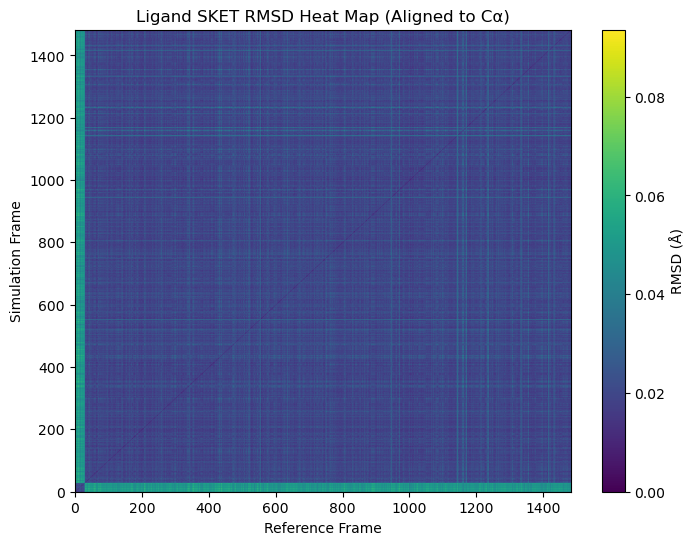

Number of ligand atoms selected: 16
Number of alignment atoms selected: 69


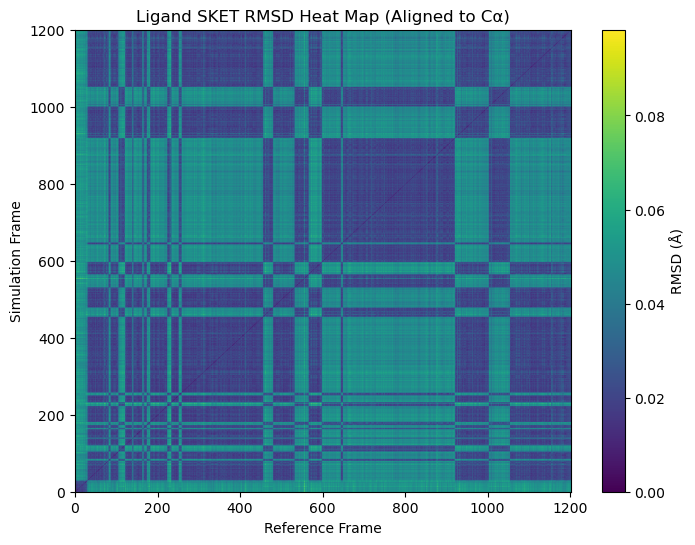

Number of ligand atoms selected: 16
Number of alignment atoms selected: 69


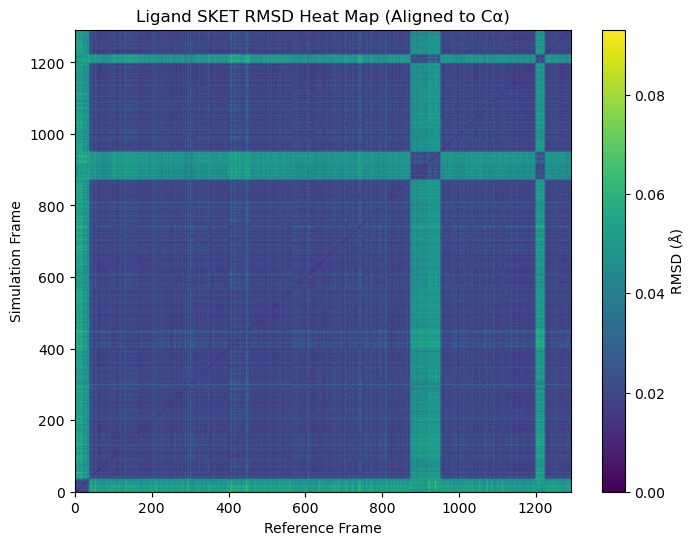

Number of ligand atoms selected: 16
Number of alignment atoms selected: 69


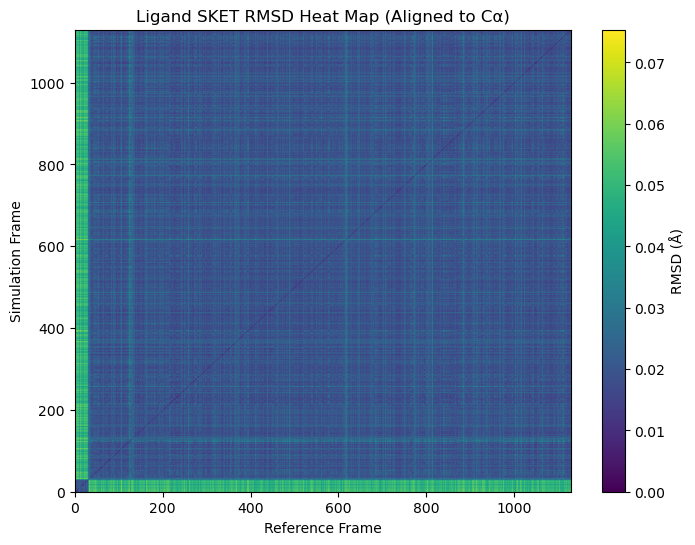

Number of ligand atoms selected: 16
Number of alignment atoms selected: 69


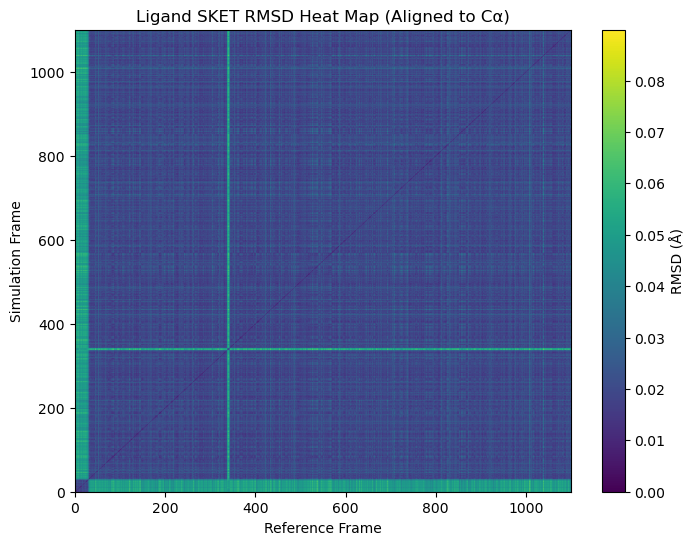

Number of ligand atoms selected: 16
Number of alignment atoms selected: 69


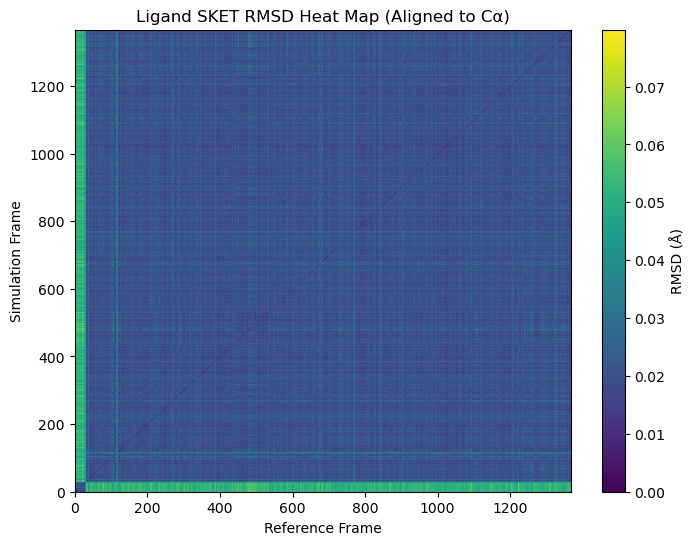

In [568]:
path_top_1 = "../SK_tao1"
path_top_2 = "/prep/dabble/system_dabbled.pdb"
path_top = path_top_1 + path_top_2
ligname = 'SKET'
for i in range(1,7):
    path_traj = f"{path_top_1}/run_{i}/summary_traj_w_eq_stride5.nc"
    make_rmsd_square(ligname, path_traj, path_top)


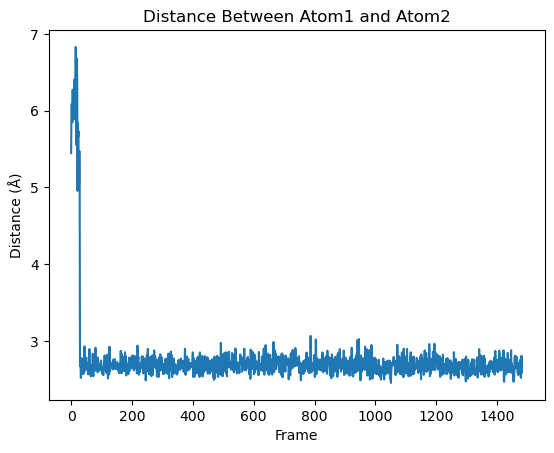

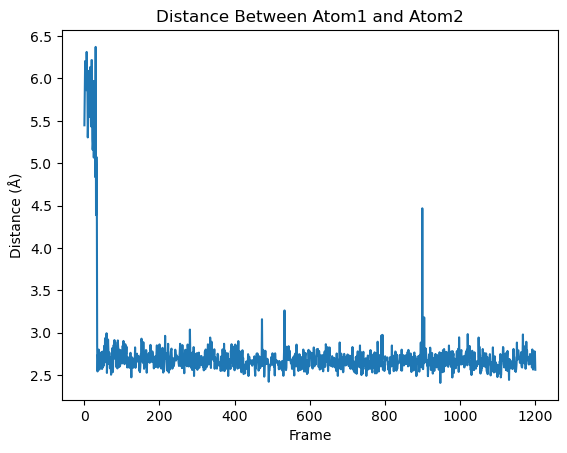

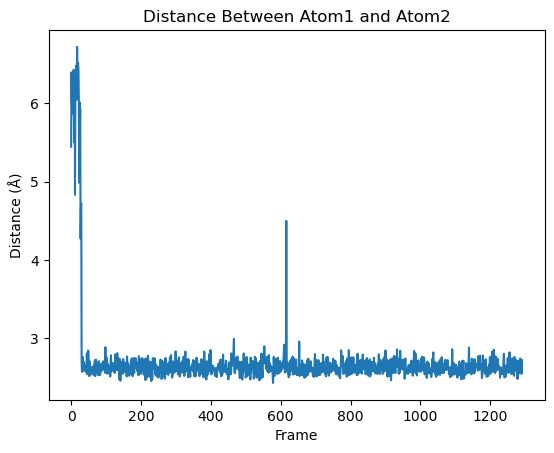

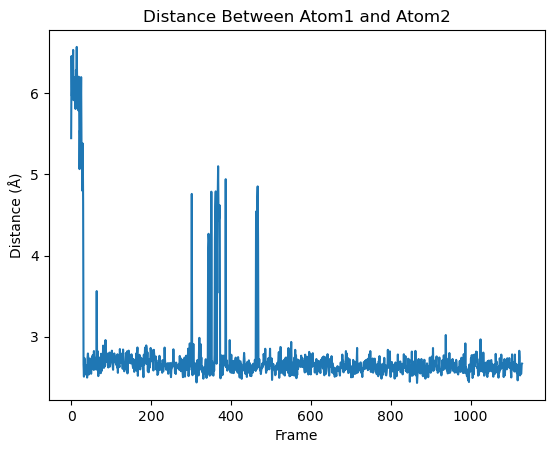

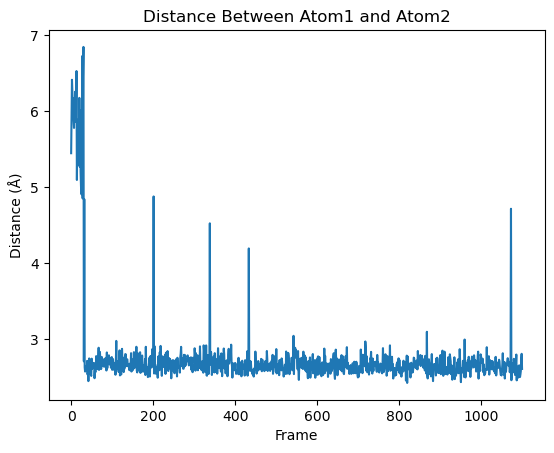

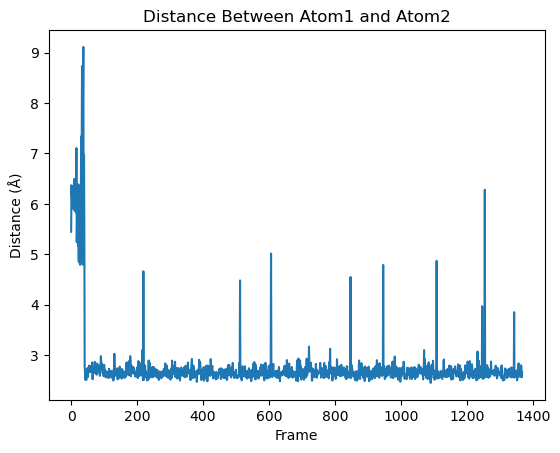

In [591]:
path_top_1 = "../SK_tao1"
path_top_2 = "/prep/dabble/system_dabbled.pdb"
path_top = path_top_1 + path_top_2
ligname = 'PCP'
for i in range(1,7):
    path_traj = f"{path_top_1}/run_{i}/summary_traj_w_eq_stride5.nc"
    traj = md.load(path_traj, top=path_top)

    # Select atom indices (change residue names and atom names as needed)
    atom1_index = traj.topology.select("resname SKET and name N02")[0]  # Select first carbon in ligand
    atom2_index = traj.topology.select("resid 10913 and name OD2")[0]
    atom3_index = traj.topology.select("resid 10913 and name OD1")[0]# Select alpha carbon of residue 100

    # Compute distances between atom1 and atom2 for each frame
    distances = md.compute_distances(traj, [[atom1_index, atom2_index]])
    distances_2 = md.compute_distances(traj, [[atom1_index, atom3_index]])
    
    dist_min = []
    
    for i in range(len(distances)):
        dist_min.append(min(distances[i], distances_2[i]))

    # Plot distance over time
    plt.plot(np.array(dist_min)*10)
    plt.xlabel("Frame")
    plt.ylabel("Distance (Å)")
    plt.title("Distance Between Atom1 and Atom2")
    plt.show()

Number of ligand atoms selected: 18
Number of alignment atoms selected: 69


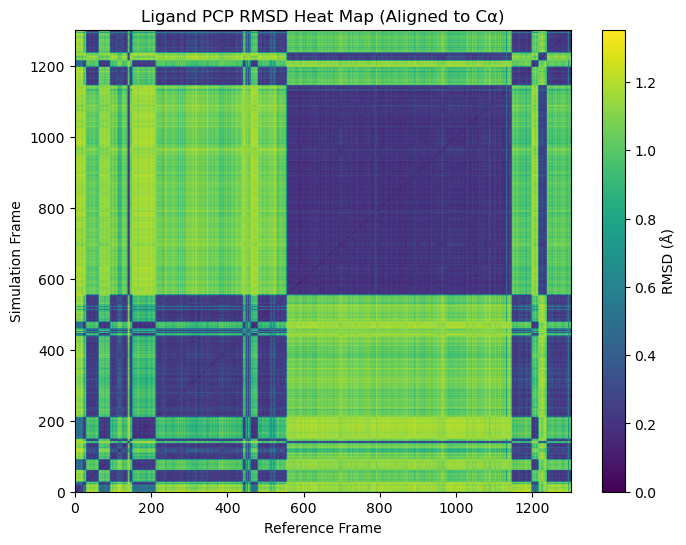

Number of ligand atoms selected: 18
Number of alignment atoms selected: 69


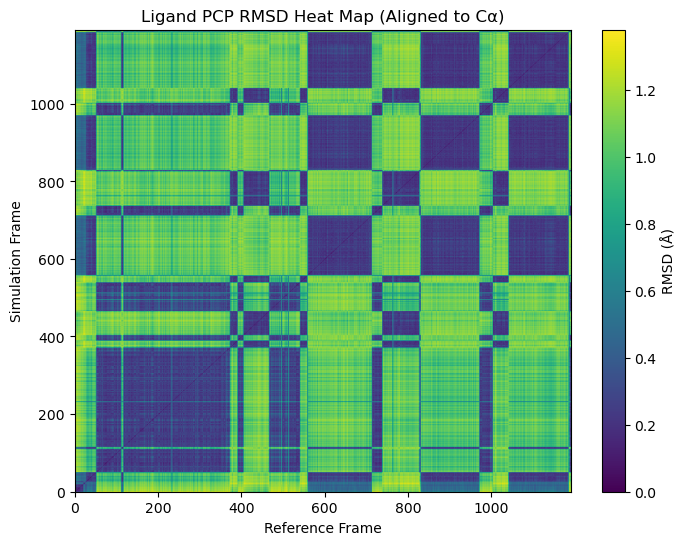

Number of ligand atoms selected: 18
Number of alignment atoms selected: 69


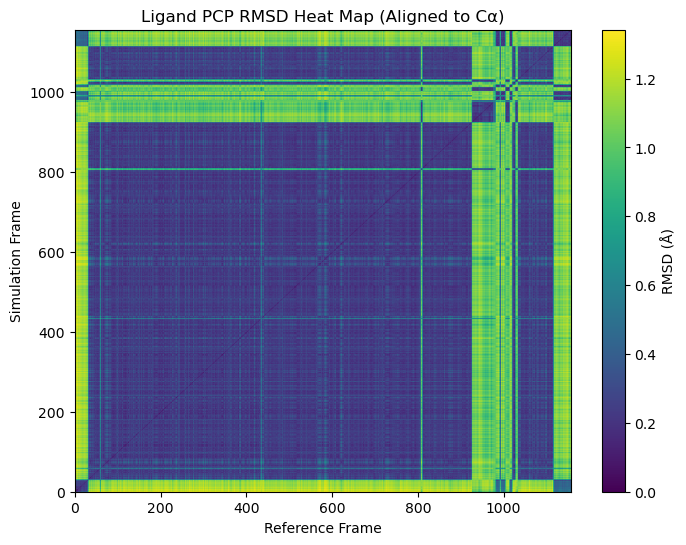

Number of ligand atoms selected: 18
Number of alignment atoms selected: 69


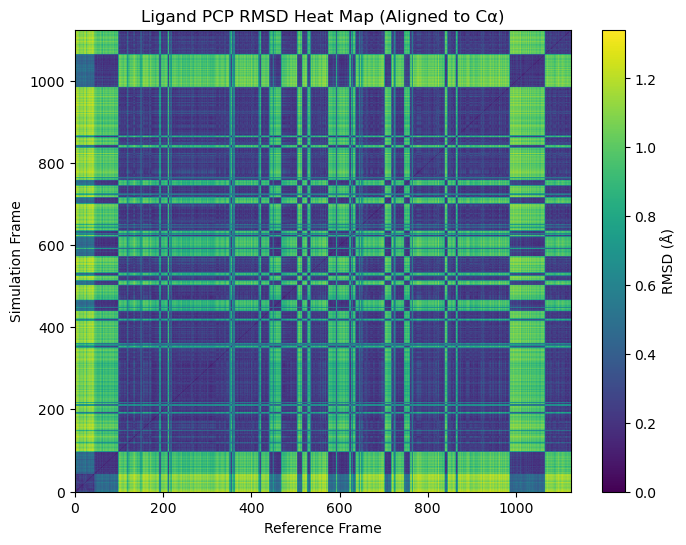

Number of ligand atoms selected: 18
Number of alignment atoms selected: 69


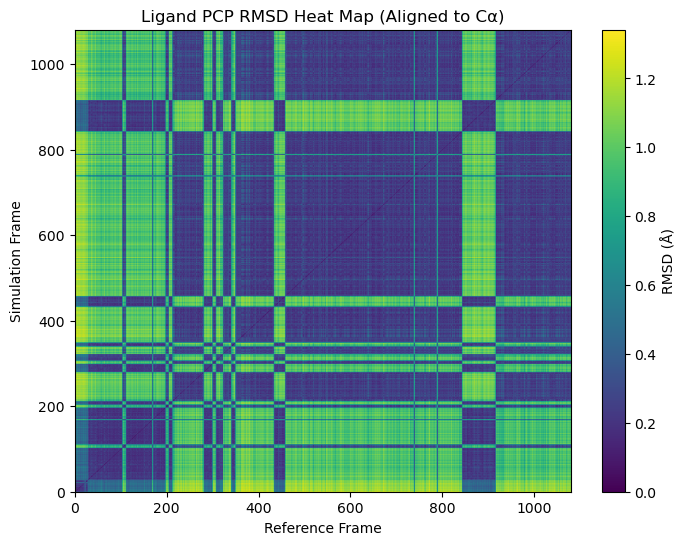

Number of ligand atoms selected: 18
Number of alignment atoms selected: 69


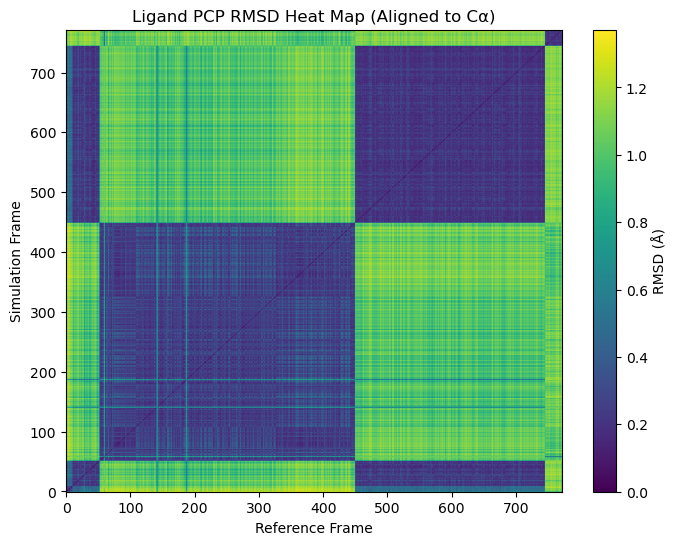

In [610]:
path_top_1 = "../PCP_tao"
path_top_2 = "/prep/dabble/system_dabbled.pdb"
path_top = path_top_1 + path_top_2
ligname = 'PCP'
for i in range(1,7):
    path_traj = f"{path_top_1}/run_{i}/summary_traj_w_eq_stride5.nc"
    make_rmsd_square(ligname, path_traj, path_top)


In [ ]:
PCP_rmsd = make_lists(data_PCP,'PCP',reps,start=start,finish=finish,skip=False,met='starting')


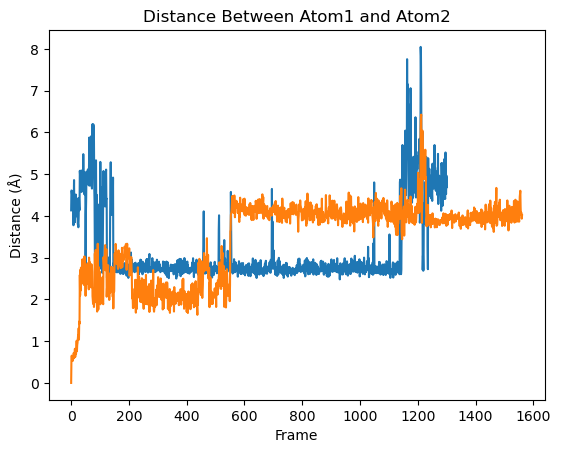

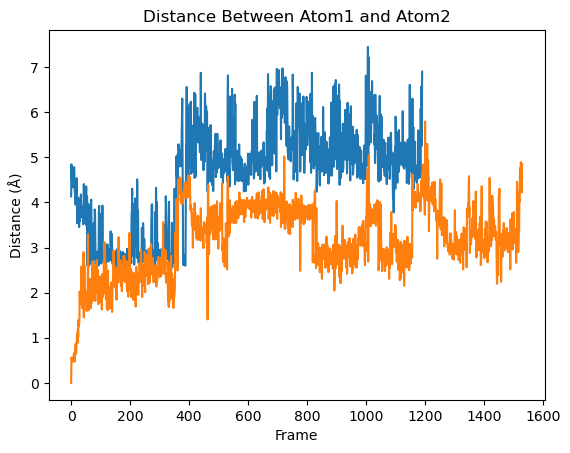

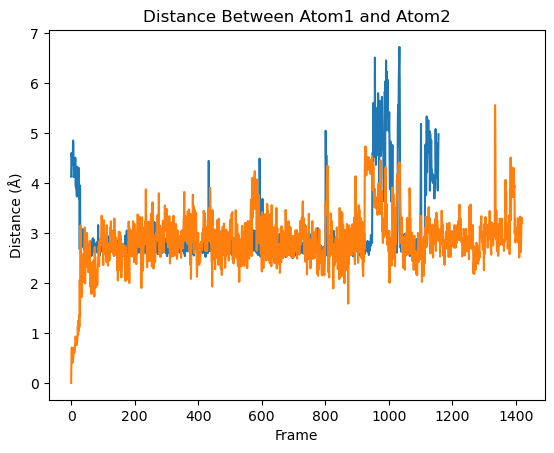

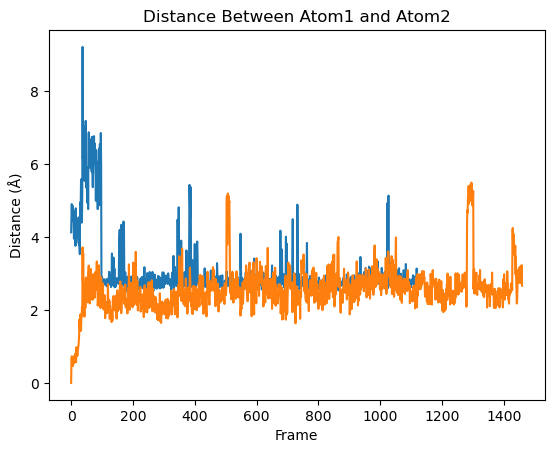

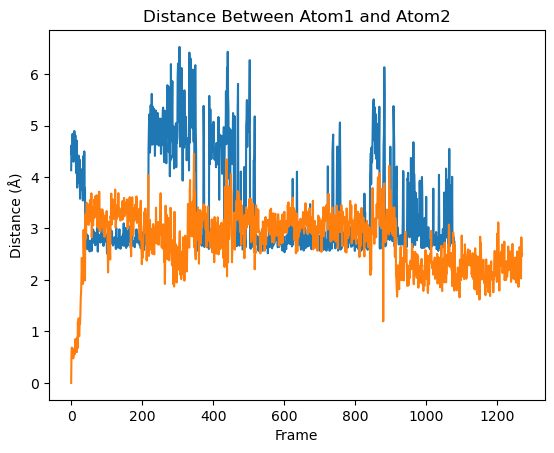

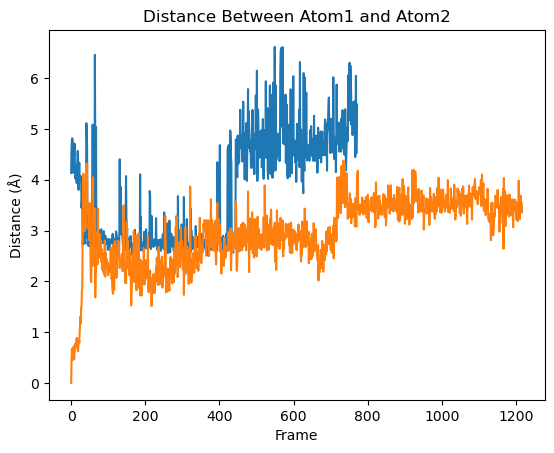

In [613]:
path_top_1 = "../PCP_tao"
path_top_2 = "/prep/dabble/system_dabbled.pdb"
path_top = path_top_1 + path_top_2
ligname = 'PCP'
for i in range(1,7):
    path_traj = f"{path_top_1}/run_{i}/summary_traj_w_eq_stride5.nc"
    traj = md.load(path_traj, top=path_top)
    dist_min = []
    #print(data_PCP['PCP'])
    PCP_rmsd = data_PCP['PCP'][f'PCP_r{i}']['starting'].values
    #PCP_rmsd = make_rmsd_square(ligname, path_traj, path_top, one=True)


    # Select atom indices (change residue names and atom names as needed)
    atom1_index = traj.topology.select("resname PCP and name N13")[0]  # Select first carbon in ligand
    atom2_index = traj.topology.select("resid 11190 and name OD2")[0]  # Select alpha carbon of residue 100
    atom3_index = traj.topology.select("resid 11190 and name OD1")[0]

    # Compute distances between atom1 and atom2 for each frame
    distances = md.compute_distances(traj, [[atom1_index, atom2_index]])
    distances_2 = md.compute_distances(traj, [[atom1_index, atom3_index]])

    for i in range(len(distances)):
        dist_min.append(min(distances[i], distances_2[i]))

    # Plot distance over time
    plt.plot(np.array(dist_min)*10)
    plt.plot(PCP_rmsd)
    # Plot distance over time
    plt.xlabel("Frame")
    plt.ylabel("Distance (Å)")
    plt.title("Distance Between Atom1 and Atom2")
    plt.show()
    #trmake_rmsd_square(ligname, path_traj, path_top)

In [ ]:
# Load trajectory
traj = md.load("trajectory.dcd", top="topology.pdb")

# Select atom indices (change residue names and atom names as needed)
atom1_index = traj.topology.select("resname PCP and name N13")[0]  # Select first carbon in ligand
atom2_index = traj.topology.select("resid 11190 and name OD2")[0]  # Select alpha carbon of residue 100

# Compute distances between atom1 and atom2 for each frame
distances = md.compute_distances(traj, [[atom1_index, atom2_index]])

# Plot distance over time
plt.plot(distances)
plt.xlabel("Frame")
plt.ylabel("Distance (nm)")
plt.title("Distance Between Atom1 and Atom2")
plt.show()

In [580]:
11052+138

11190

In [574]:
traj = md.load(path_traj, top=path_top)

for atom in traj.topology.atoms:
    if atom.name == 'CA':  # Check residues in the range
        print(f"Atom Name: {atom.name}, Residue: {atom.residue.name}, Residue ID: {atom.residue.index}")


Atom Name: CA, Residue: SER, Residue ID: 11107
Atom Name: CA, Residue: PRO, Residue ID: 11108
Atom Name: CA, Residue: ALA, Residue ID: 11109
Atom Name: CA, Residue: ILE, Residue ID: 11110
Atom Name: CA, Residue: PRO, Residue ID: 11111
Atom Name: CA, Residue: VAL, Residue ID: 11112
Atom Name: CA, Residue: ILE, Residue ID: 11113
Atom Name: CA, Residue: ILE, Residue ID: 11114
Atom Name: CA, Residue: THR, Residue ID: 11115
Atom Name: CA, Residue: ALA, Residue ID: 11116
Atom Name: CA, Residue: VAL, Residue ID: 11117
Atom Name: CA, Residue: TYR, Residue ID: 11118
Atom Name: CA, Residue: SER, Residue ID: 11119
Atom Name: CA, Residue: VAL, Residue ID: 11120
Atom Name: CA, Residue: VAL, Residue ID: 11121
Atom Name: CA, Residue: PHE, Residue ID: 11122
Atom Name: CA, Residue: VAL, Residue ID: 11123
Atom Name: CA, Residue: VAL, Residue ID: 11124
Atom Name: CA, Residue: GLY, Residue ID: 11125
Atom Name: CA, Residue: LEU, Residue ID: 11126
Atom Name: CA, Residue: VAL, Residue ID: 11127
Atom Name: CA